In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load and form the dataframe

In [38]:
# Load the dataframe from the csv file
df = pd.read_csv('/content/StudentsPerformance.csv')

##Understand the dataframe

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [30]:
df.shape

(1000, 8)

In [31]:
# provides a summary of the central tendency, dispersion,
# and shape of the distribution of a dataset, excluding NaN values.
# By default, it only analyzes numerical columns and returns statistics like mean,
# standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2),
# 75th percentile (Q3), and maximum.
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
df.columns.tolist() # returns the names for each columns as a list

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [33]:
df.nunique() # returns the number of unique values for each column in a DataFrame

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
df['race/ethnicity'].unique() # returns the unique values in a column

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

##Clean the dataframe

In [35]:
df.isnull().sum() # returns the number of missing values in each column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [39]:
dropped_df = df.drop(columns=['race/ethnicity', 'parental level of education'], axis=1)
dropped_df.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


##Relationship Analysis

<ipython-input-42-3c9cff68aad2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dropped_df.corr() # returns the correlation matrix


<Axes: >

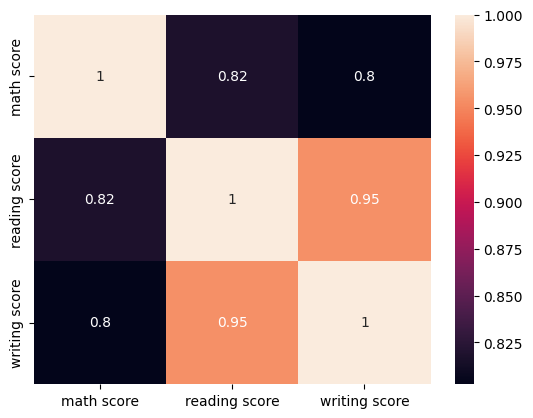

In [42]:
# Check the coefficient
corr = dropped_df.corr() # returns the correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,annot=True)

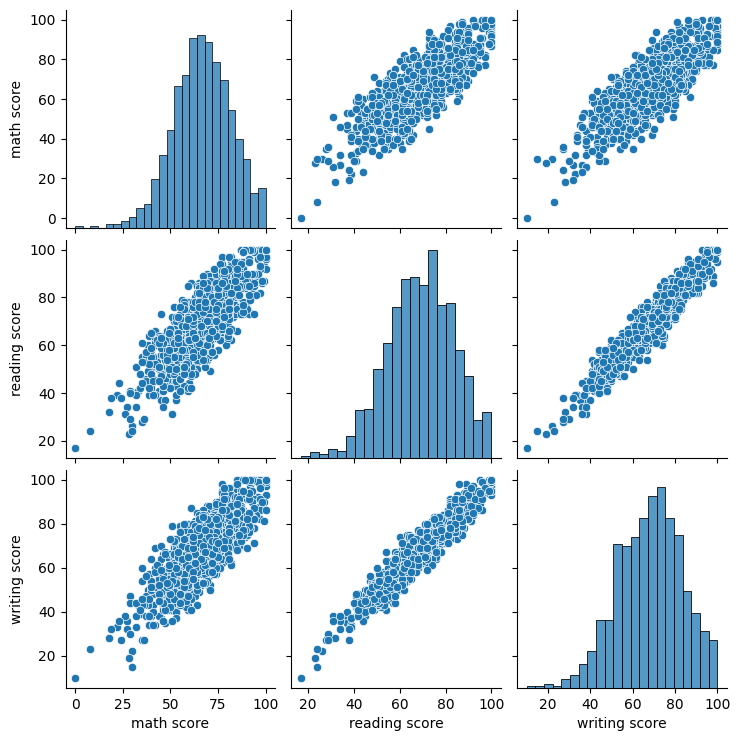

In [43]:
sns.pairplot(dropped_df) # returns a pairplot

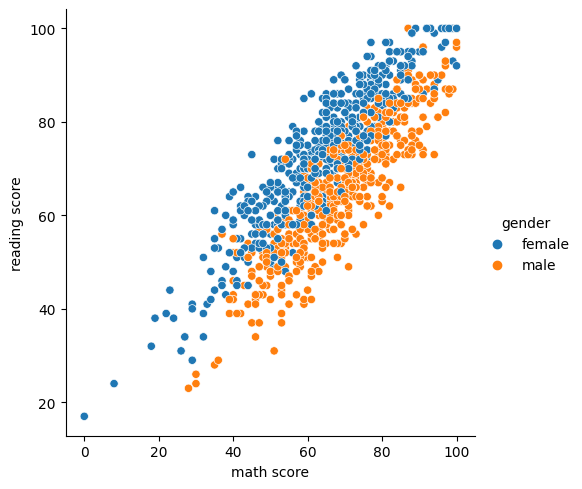

In [44]:
sns.relplot(x='math score', y='reading score', hue='gender', data=dropped_df)

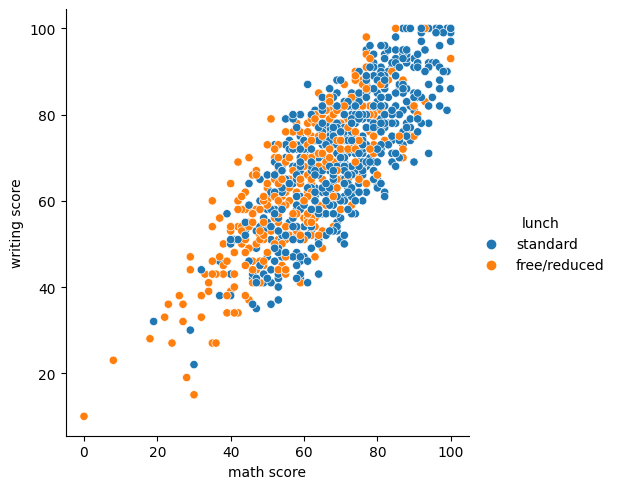

In [45]:
sns.relplot(x='math score', y='writing score', hue='lunch', data=dropped_df)

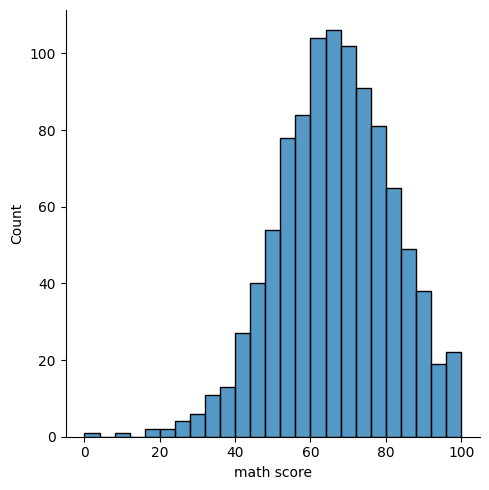

In [47]:
sns.displot(dropped_df['math score'])

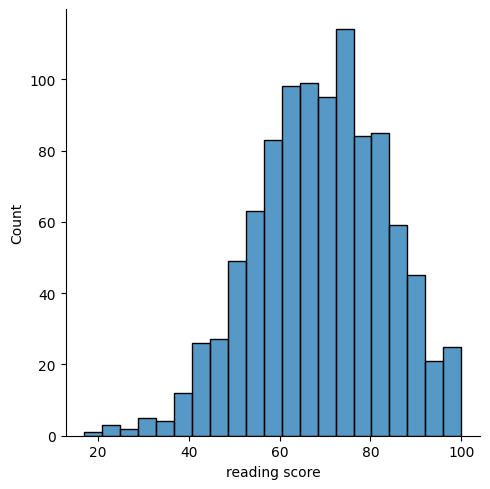

In [48]:
sns.displot(dropped_df['reading score'])

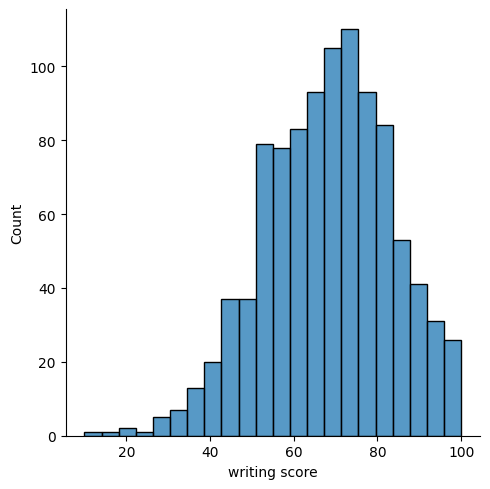

In [49]:
sns.displot(dropped_df['writing score'])

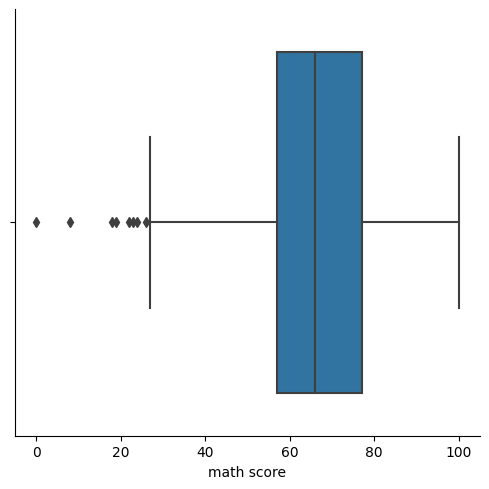

In [51]:
sns.catplot(x='math score', kind='box', data=dropped_df)